# Confidence regions of the bivariate $t$-distribution

In this notebook, we provide (and test) a function to plot $\alpha \times 100\%$ confidence regions of a given bivariate $t$-distribution. No sampling is required for plotting the confidence regions. See the Appendix in our manuscript for details.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_t, invwishart
from modules.plot_helpers import plot_confregion_bivariate_t

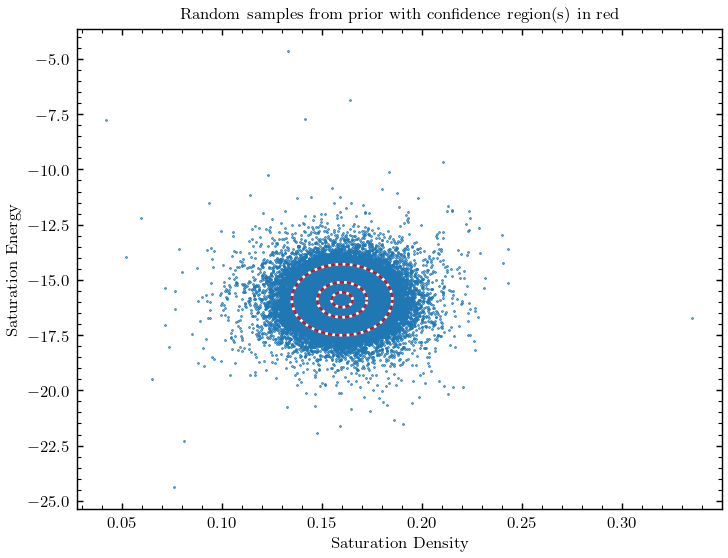

In [3]:
prior_params = {"mu": np.array([0.16, -15.9]),
                "Psi": np.array([[0.005**2, 0.0], [0.0, 0.32**2]]),
                "kappa": 1, "nu": 5}
fig, ax = plt.subplots(1,1)
plot_confregion_bivariate_t(ax=ax, mu=prior_params["mu"], 
                            Sigma=prior_params["Psi"], nu=prior_params["nu"], 
                            alpha=list(range(1,4)), alpha_unit="normal_std", num_pts=1000000, 
                            plot_scatter=True, validate=True)
ax.set_title("Random samples from prior with confidence region(s) in red")
ax.set_xlabel("Saturation Density")
ax.set_ylabel("Saturation Energy")
plt.savefig("confidence_region_test1.png")

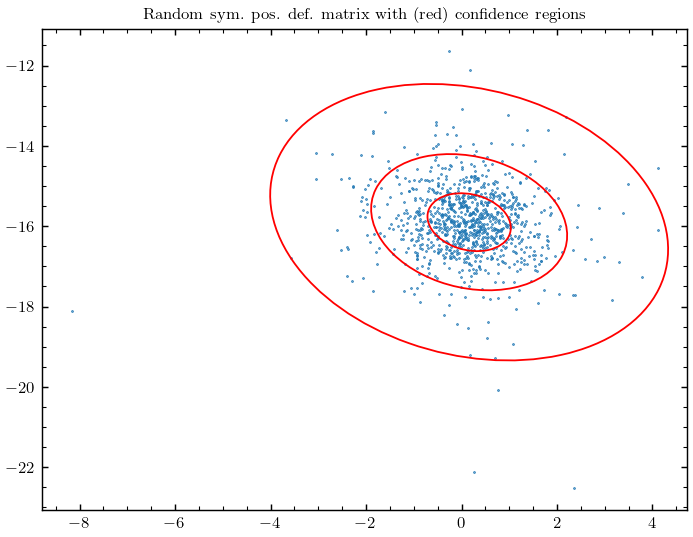

In [4]:
mat = invwishart.rvs(4,np.eye(2)*3)
fig, ax = plt.subplots(1,1)
plot_confregion_bivariate_t(ax=ax, mu=prior_params["mu"], Sigma=mat, 
                            nu=prior_params["nu"], 
                            alpha=list(range(1,4)), alpha_unit="normal_std", num_pts=1000, 
                            plot_scatter=True, validate=False)
ax.set_title("Random sym. pos. def. matrix with (red) confidence regions")
fig.savefig("prior_satpoint_conf_regions_test2.png")

# Confidence regions of the bivariate Normal distribution

In [5]:
from scipy.stats import multivariate_normal
from modules.plot_helpers import confidence_ellipse
import seaborn as sns

In [6]:
sx = 0.01
sy = 0.05
rho=0.75
mu=[1,2]
offdiag = sx*sy*rho
Sigma=[[sx**2,offdiag],[offdiag,sy**2]]
data = multivariate_normal.rvs(mean=mu, cov=Sigma, size=10000)

<AxesSubplot: >

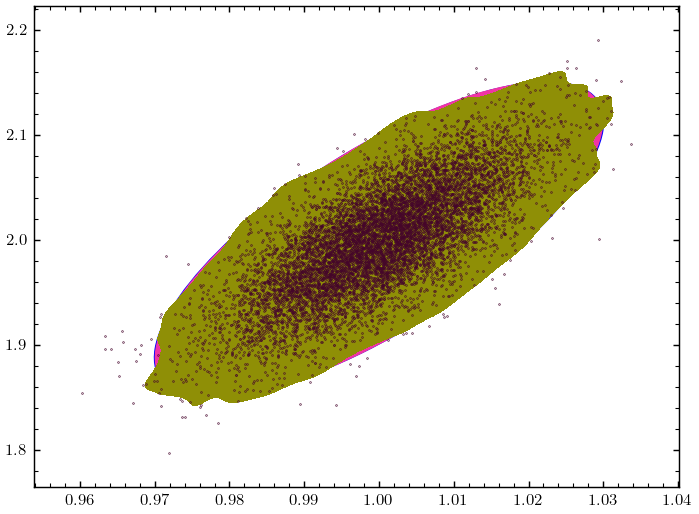

In [7]:
n_std=3
fig, ax = plt.subplots(1,1)
# determine confidence ellipse analytically
plot_confregion_bivariate_t(ax=ax, mu=mu, Sigma=Sigma, 
                            nu=10000, 
                            alpha=n_std, alpha_unit="normal_std", num_pts=100000, 
                            plot_scatter=False, validate=False, edgecolor="b")

# estimate confidence ellipse
confidence_ellipse(ax=ax, x=data[:,0], y=data[:,1], n_std=n_std, show_scatter=True, facecolor='#F034A3')

# use KDE to estimate confidence ellipse
levels = [np.exp(-n_std**2 / 2), 1.]
sns.kdeplot(ax=ax, x=data[:, 0], y=data[:, 1],
            fill=True, levels=levels,
            label=f"",
            legend=False,
            color="y")
#ax.set_xlim(-4,4)
#ax.set_xlim(-4,4)